Набор данных "Google Play Store Apps" с Kaggle представляет собой информацию о различных приложениях, доступных в магазине Google Play Store. Датасет содержит следующие столбцы:

1. App: Название приложения.
2. Category: Категория, к которой относится приложение.
3. Rating: Рейтинг приложения на основе пользовательских отзывов (от 0 до 5).
4. Reviews: Количество пользовательских отзывов о приложении.
5. Size: Размер приложения.
6. Installs: Количество установок приложения.
7. Type: Тип приложения (бесплатное или платное).
8. Price: Цена приложения.
9. Content Rating: Возрастной рейтинг контента приложения.
10. Genres: Жанры, к которым относится приложение.
11. Last Updated: Дата последнего обновления приложения.
12. Current Ver: Текущая версия приложения.
13. Android Ver: Минимальная версия Android, необходимая для работы приложения.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = pd.read_csv('googleplaystore.csv', sep=',')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [65]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [66]:
# Проверим наличие пропущенных данных
missing_values = data.isnull().sum()
print("Пропущенные данные по столбцам:")
print(missing_values)

Пропущенные данные по столбцам:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [67]:
data.shape

(10841, 13)

In [68]:
data.dropna(inplace=True)


In [69]:
data.shape

(9360, 13)

In [70]:
# Вывод списка категориальных признаков
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print("Список категориальных признаков:")
print(categorical_features)



Список категориальных признаков:
['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [71]:
# Кодирование категориальных признаков 'Category' и 'Content Rating' с помощью One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['Type'])
data_encoded.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,True,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,True,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,True,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,True,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,True,False


In [74]:
from sklearn.preprocessing import LabelEncoder

# Инициализация объекта LabelEncoder
label_encoder = LabelEncoder()

# Применение Label Encoding к столбцу 'Type'
data['Content Rating encoded'] = label_encoder.fit_transform(data['Content Rating'])

# Вывод уникальных значений до и после кодирования
print("Уникальные значения столбца 'Content Rating' до кодирования:")
print(data['Content Rating'].unique())
print("\nУникальные значения столбца 'Content Rating encoded' после кодирования:")
print(data['Content Rating encoded'].unique())


Уникальные значения столбца 'Content Rating' до кодирования:
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']

Уникальные значения столбца 'Content Rating encoded' после кодирования:
[1 4 2 3 0 5]


In [79]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
# 1. Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_encoded['Rating_MinMax'] = min_max_scaler.fit_transform(data_encoded[['Rating']])

# 2. Standard Scaling
standard_scaler = StandardScaler()
data_encoded['Rating_Standard'] = standard_scaler.fit_transform(data_encoded[['Rating']])

# 3. Robust Scaling
robust_scaler = RobustScaler()
data_encoded['Rating_Robust'] = robust_scaler.fit_transform(data_encoded[['Rating']])

# Просмотр первых нескольких строк для проверки результатов
print("Первые нескольких строк датасета с масштабированными рейтингами:")
print(data_encoded[['Rating', 'Rating_MinMax', 'Rating_Standard', 'Rating_Robust']].head())


Первые нескольких строк датасета с масштабированными рейтингами:
   Rating  Rating_MinMax  Rating_Standard  Rating_Robust
0     4.1          0.775        -0.178244           -0.4
1     3.9          0.725        -0.566416           -0.8
2     4.7          0.925         0.986272            0.8
3     4.5          0.875         0.598100            0.4
4     4.3          0.825         0.209928            0.0


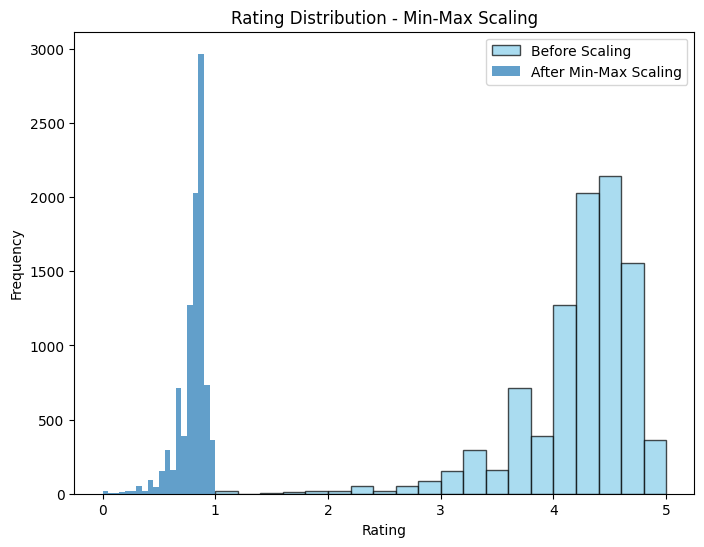

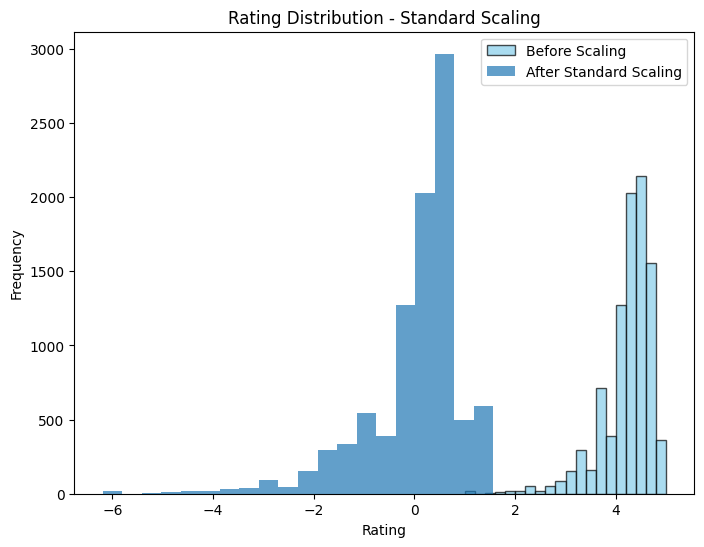

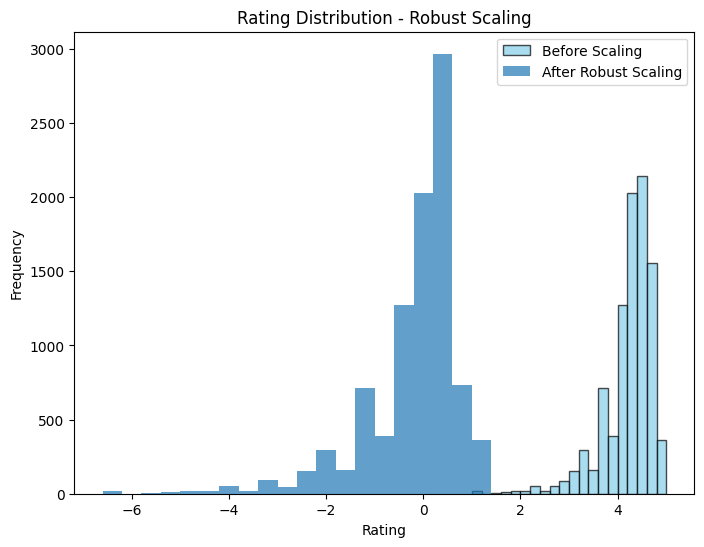

In [82]:
# Функция для построения гистограммы
def plot_scaling_comparison_individual(data, column, scaled_column, method_name):
    plt.figure(figsize=(8, 6))
    
    # Гистограмма до масштабирования
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label="Before Scaling")
    
    # Гистограмма после масштабирования
    plt.hist(data[scaled_column], bins=20, alpha=0.7, label="After " + method_name)
    
    plt.title("Rating Distribution - " + method_name)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Построение графиков для каждого метода масштабирования
for i, scaled_column in enumerate(scaled_columns):
    plot_scaling_comparison_individual(data_encoded, 'Rating', scaled_column, method_names[i])

